In [4]:
import torch
import torch.nn as nn
import torchviz
import sys; sys.path.insert(0, '../')
from exp import nb_d2l_utils

In [5]:
torch.__version__

'1.3.1'

In [42]:
model = VGG(make_layers(cfgs['A'], in_channels=1, batch_norm=False))

In [36]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [37]:
nb_d2l_utils.layer_description(model, x = torch.randn((1,1,224,224)))

Conv2d Output shape:	 torch.Size([1, 64, 224, 224])
ReLU Output shape:	 torch.Size([1, 64, 224, 224])
MaxPool2d Output shape:	 torch.Size([1, 64, 112, 112])
Conv2d Output shape:	 torch.Size([1, 128, 112, 112])
ReLU Output shape:	 torch.Size([1, 128, 112, 112])
MaxPool2d Output shape:	 torch.Size([1, 128, 56, 56])
Conv2d Output shape:	 torch.Size([1, 256, 56, 56])
ReLU Output shape:	 torch.Size([1, 256, 56, 56])
Conv2d Output shape:	 torch.Size([1, 256, 56, 56])
ReLU Output shape:	 torch.Size([1, 256, 56, 56])
MaxPool2d Output shape:	 torch.Size([1, 256, 28, 28])
Conv2d Output shape:	 torch.Size([1, 512, 28, 28])
ReLU Output shape:	 torch.Size([1, 512, 28, 28])
Conv2d Output shape:	 torch.Size([1, 512, 28, 28])
ReLU Output shape:	 torch.Size([1, 512, 28, 28])
MaxPool2d Output shape:	 torch.Size([1, 512, 14, 14])
Conv2d Output shape:	 torch.Size([1, 512, 14, 14])
ReLU Output shape:	 torch.Size([1, 512, 14, 14])
Conv2d Output shape:	 torch.Size([1, 512, 14, 14])
ReLU Output shape:	 torch.

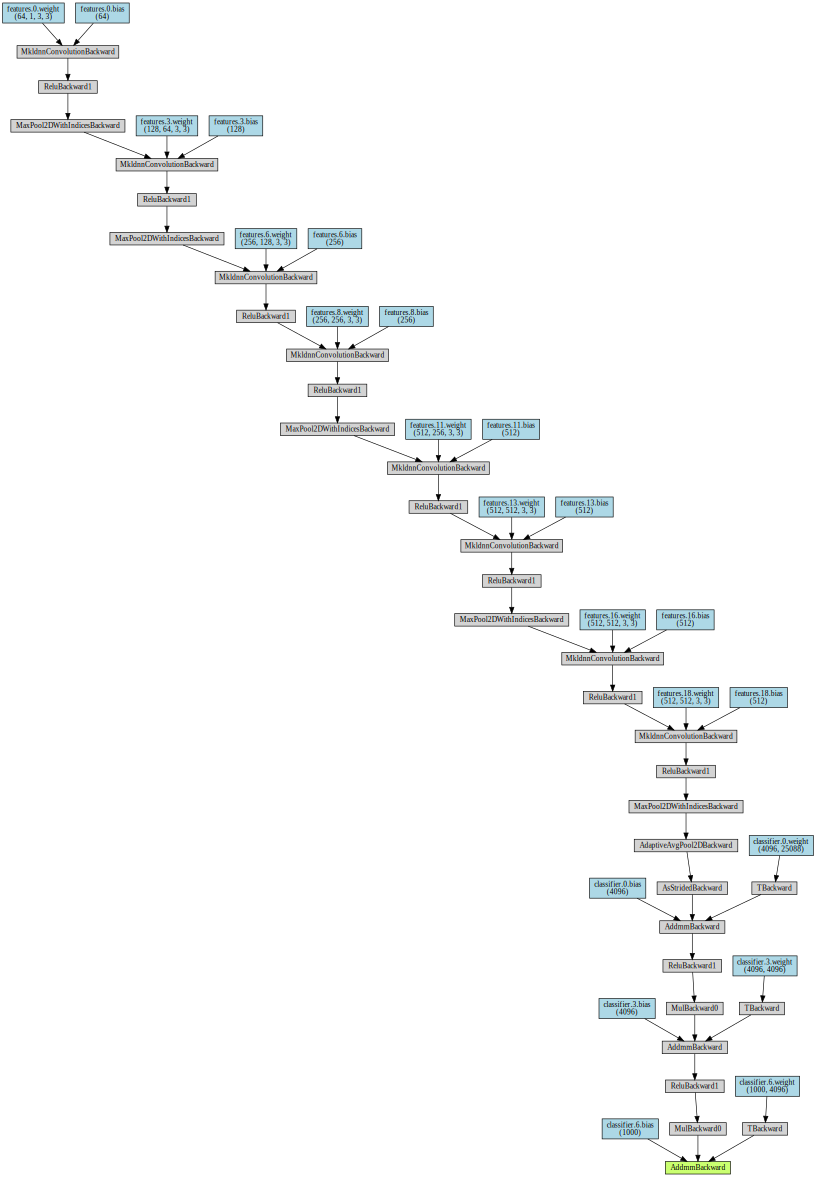

In [38]:
x = torch.randn((1,1,224,224))
torchviz.make_dot(model(x), params=dict(list(model.named_parameters()) + [('x', x)]))

In [7]:
# x = torch.randn((1,1,28,28))
# model = LeNet()

# with torch.onnx.set_training(model, False):
#     trace, _ = torch.jit.get_trace_graph(model, args=(x,))
# torchviz.make_dot_from_trace(trace)


In [43]:
torch.save(model, 'models/vgg11_model.pt')

In [45]:
dummy_input = torch.randn((1,1,224,224))
torch.onnx.export(model, dummy_input, "models/vgg11.onnx", verbose=True)

graph(%input.1 : Float(1, 1, 224, 224),
      %features.0.weight : Float(64, 1, 3, 3),
      %features.0.bias : Float(64),
      %features.3.weight : Float(128, 64, 3, 3),
      %features.3.bias : Float(128),
      %features.6.weight : Float(256, 128, 3, 3),
      %features.6.bias : Float(256),
      %features.8.weight : Float(256, 256, 3, 3),
      %features.8.bias : Float(256),
      %features.11.weight : Float(512, 256, 3, 3),
      %features.11.bias : Float(512),
      %features.13.weight : Float(512, 512, 3, 3),
      %features.13.bias : Float(512),
      %features.16.weight : Float(512, 512, 3, 3),
      %features.16.bias : Float(512),
      %features.18.weight : Float(512, 512, 3, 3),
      %features.18.bias : Float(512),
      %classifier.0.weight : Float(4096, 25088),
      %classifier.0.bias : Float(4096),
      %classifier.3.weight : Float(4096, 4096),
      %classifier.3.bias : Float(4096),
      %classifier.6.weight : Float(1000, 4096),
      %classifier.6.bias : Float(100